In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Car_Insurance_Claim.csv")
print(df.shape)
print('\n', df.columns)
print('\n', df.head())

drop_cols = ['ID', 'Unnamed: 0']

(10000, 20)

 Index(['Unnamed: 0', 'ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE',
       'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
       'OUTCOME'],
      dtype='object')

    Unnamed: 0      ID    AGE  GENDER      RACE DRIVING_EXPERIENCE  \
0           0  569520    65+  female  majority               0-9y   
1           1  750365  16-25    male  majority               0-9y   
2           2  199901  16-25  female  majority               0-9y   
3           3  478866  16-25    male  majority               0-9y   
4           4  731664  26-39    male  majority             10-19y   

     EDUCATION         INCOME        CREDIT_SCORE VEHICLE_OWNERSHIP  \
0  high school    upper class   0.629027313918201               1.0   
1         none        poverty  0.3577571170184627               0.0   
2  high school  working

In [3]:
df.isna().sum()

Unnamed: 0                0
ID                        0
AGE                      50
GENDER                   50
RACE                     49
DRIVING_EXPERIENCE       50
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1022
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  48
CHILDREN                 50
POSTAL_CODE              50
ANNUAL_MILEAGE         1000
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

In [4]:
for col in df.columns:
    print(df[col].unique())

[   0    1    2 ... 9997 9998 9999]
[569520 750365 199901 ... 468409 903459 442696]
['65+' '16-25' '26-39' '40-64' 'none' nan]
['female' 'male' 'none' nan]
['majority' 'minority' nan 'none']
['0-9y' '10-19y' '20-29y' '30y+' nan 'none']
['high school' 'none' 'university' nan]
['upper class' 'poverty' 'working class' 'middle class']
['0.629027313918201' '0.3577571170184627' '0.4931457852181982' ...
 '0.4709402314479679' '0.3641847847297929' '0.4352247779429113']
['1.0' '0.0' 'none' nan]
['after 2015' 'before 2015' nan 'none']
['0.0' '1.0' nan 'none']
['1.0' '0.0' 'none' nan]
['10238' '32765' '32765.0' '10238.0' '92101' '21217' '92101.0' '21217.0'
 nan 'none']
['12000.0' '16000.0' '11000.0' '13000.0' '14000.0' '10000.0' 'none' nan
 '18000.0' '17000.0' '8000.0' '7000.0' '15000.0' '9000.0' '5000.0'
 '6000.0' '19000.0' '4000.0' '3000.0' '2000.0' '20000.0' '21000.0'
 '22000.0']
['sedan' 'sports car' 'none' nan]
['0' '2' '3' '7' '6' '4' '10' '13' '1' '5' '9' '8' '12' nan 'none' '11'
 '15' '17'

In [5]:
mapping_dicts = {
    'AGE': {'65+': 65, '16-25': 20, '26-39': 35, '40-64': 50, 'none': np.nan},
    'GENDER': {'male': 0, 'female': 1, 'none': np.nan},
    'RACE': {'majority': 1, 'minority': 0, 'none': np.nan},
    'DRIVING_EXPERIENCE': {'0-9y': 5, '10-19y': 15, '20-29y': 25, '30y+': 30, 'none': np.nan},
    'EDUCATION': {'high school': 0, 'university': 1, 'none': -1},
    'INCOME': {'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3},
    'VEHICLE_YEAR': {'after 2015': 0, 'before 2015': 1, 'none': np.nan},
    'VEHICLE_TYPE': {'sedan': 0, 'sports car': 1, 'none': np.nan}
}

for column, mapping in mapping_dicts.items():
    df[column] = df[column].map(mapping)

numeric_columns = [
    'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
    'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
    'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'
]

for col in numeric_columns:
    df[col] = df[col].replace('none', np.nan)
    df[col] = pd.to_numeric(df[col])

df = df[df['OUTCOME'].notna()]

df.head(15)

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65.0,1.0,1.0,5.0,0.0,3,0.629027,1.0,0.0,0.0,1.0,10238.0,12000.0,0.0,0.0,0.0,0.0,0.0
1,1,750365,20.0,0.0,1.0,5.0,-1.0,0,0.357757,0.0,1.0,0.0,0.0,10238.0,16000.0,0.0,0.0,0.0,0.0,1.0
2,2,199901,20.0,1.0,1.0,5.0,0.0,1,0.493146,1.0,1.0,0.0,0.0,10238.0,11000.0,0.0,0.0,0.0,0.0,0.0
3,3,478866,20.0,0.0,1.0,5.0,1.0,1,0.206013,1.0,1.0,0.0,NaN,32765.0,11000.0,0.0,0.0,0.0,0.0,0.0
4,4,731664,35.0,0.0,1.0,15.0,-1.0,1,0.388366,1.0,1.0,0.0,0.0,32765.0,12000.0,0.0,2.0,0.0,1.0,1.0
5,5,877557,50.0,1.0,1.0,25.0,0.0,3,0.619127,1.0,0.0,0.0,1.0,10238.0,13000.0,0.0,3.0,0.0,3.0,0.0
6,6,930134,65.0,0.0,1.0,30.0,0.0,3,0.492944,0.0,0.0,1.0,1.0,10238.0,13000.0,0.0,7.0,0.0,3.0,0.0
7,7,461006,35.0,1.0,1.0,5.0,1.0,1,0.468689,0.0,0.0,0.0,1.0,10238.0,14000.0,0.0,0.0,0.0,0.0,1.0
8,8,68366,50.0,1.0,1.0,25.0,1.0,1,0.521815,0.0,1.0,1.0,0.0,10238.0,13000.0,0.0,0.0,0.0,0.0,0.0
9,9,445911,50.0,1.0,1.0,5.0,NaN,3,0.561531,1.0,1.0,0.0,1.0,32765.0,11000.0,0.0,0.0,0.0,0.0,1.0


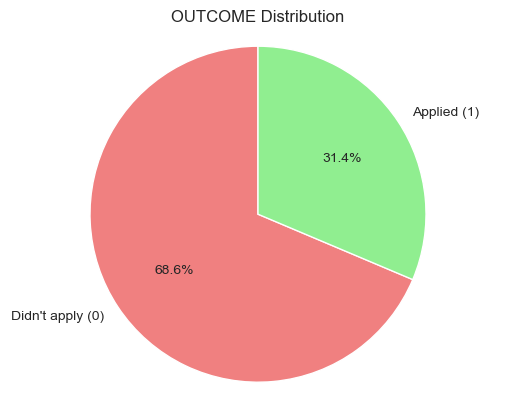

In [6]:
outcome_counts = df['OUTCOME'].value_counts().sort_index()
labels = ["Didn't apply (0)", 'Applied (1)']
colors = ['lightcoral', 'lightgreen']

plt.figure()
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('OUTCOME Distribution')
plt.axis('equal')

plt.show()

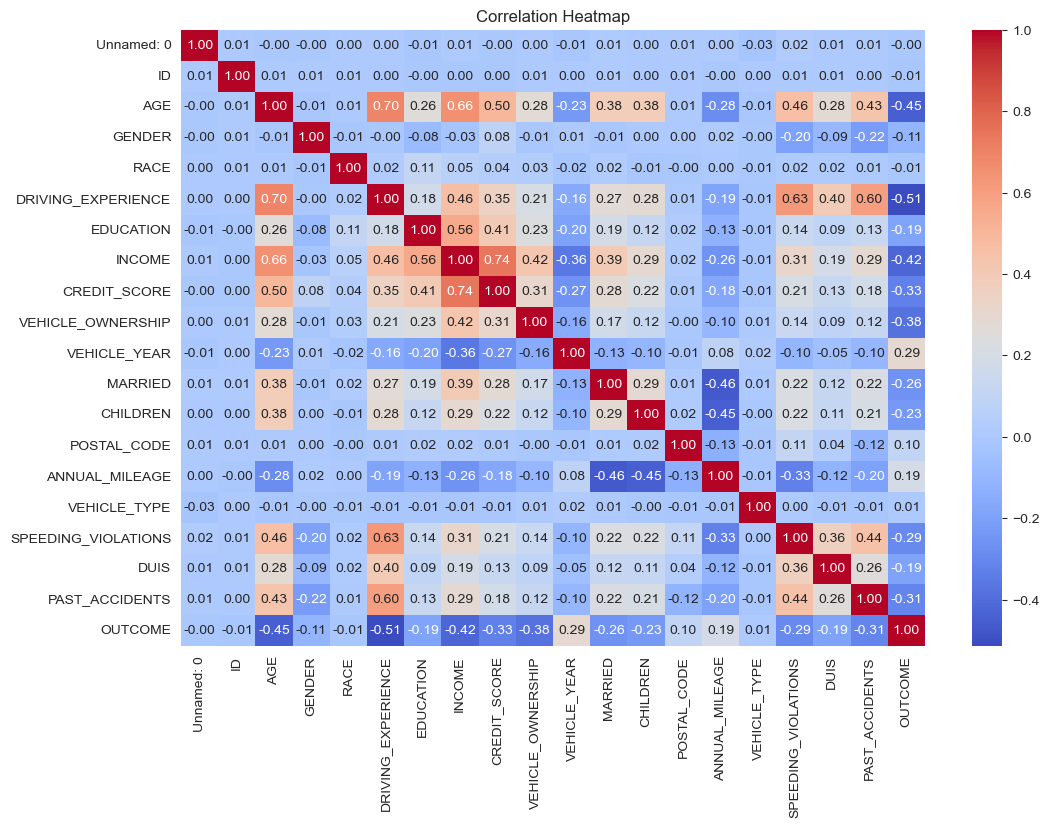

In [7]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

From the correlation matrix, we see moderate correlations with the target parameter in the features AGE, DRIVING_EXPERIENCE, VEHICLE_OWNERSHIP.
To a lesser extent, linear relationships are visible with the features INCOME, SPEED_VIOLATIONS, CREDIT_SCORE, PAST_ACCIDENTS, VEHICLE_YEAR

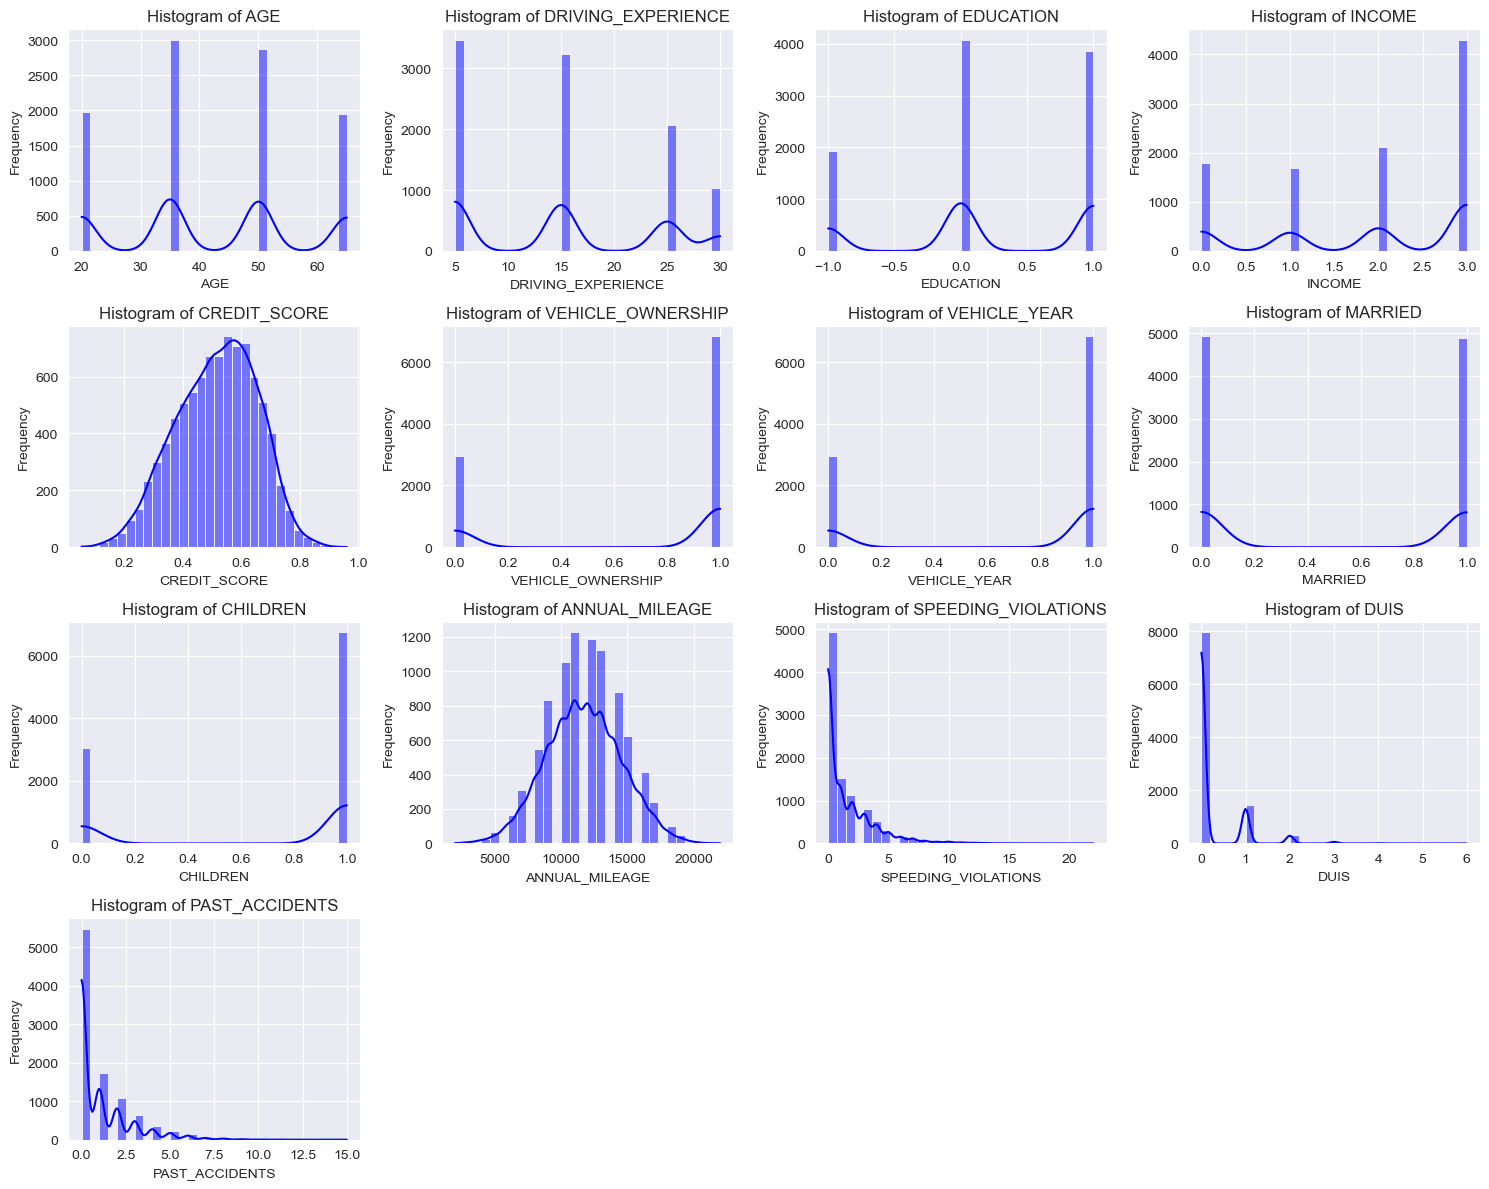

In [8]:
numerical_features = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                      'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
                      'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                      'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


From these histograms, we can understand that we do not have many emissions and they have a minor impact.

In [9]:
print(df.isna().sum())

Unnamed: 0                0
ID                        0
AGE                      99
GENDER                   99
RACE                     96
DRIVING_EXPERIENCE       99
EDUCATION                48
INCOME                    0
CREDIT_SCORE           1061
VEHICLE_OWNERSHIP        99
VEHICLE_YEAR             99
MARRIED                  97
CHILDREN                 98
POSTAL_CODE              99
ANNUAL_MILEAGE         1041
VEHICLE_TYPE             97
SPEEDING_VIOLATIONS      99
DUIS                     99
PAST_ACCIDENTS          100
OUTCOME                   0
dtype: int64


In [10]:
df[df['AGE'].isna()].head(99)

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
258,258,81394,NaN,0.0,1.0,5.0,-1.0,0,0.313646,1.0,1.0,0.0,1.0,10238.0,13000.0,0.0,0.0,0.0,0.0,0.0
377,377,22475,NaN,1.0,1.0,5.0,0.0,2,0.590567,1.0,1.0,1.0,0.0,10238.0,11000.0,0.0,0.0,0.0,0.0,0.0
388,388,178142,NaN,0.0,1.0,15.0,1.0,3,0.573910,1.0,1.0,1.0,1.0,10238.0,11000.0,0.0,1.0,0.0,4.0,0.0
511,511,55182,NaN,1.0,1.0,15.0,0.0,1,0.517826,1.0,0.0,0.0,0.0,32765.0,10000.0,0.0,2.0,0.0,0.0,0.0
571,571,626735,NaN,1.0,1.0,5.0,1.0,1,NaN,1.0,NaN,0.0,0.0,32765.0,13000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,9700,860778,NaN,1.0,1.0,25.0,-1.0,3,0.628670,1.0,1.0,0.0,1.0,32765.0,11000.0,0.0,6.0,1.0,3.0,0.0
9745,9745,104053,NaN,1.0,1.0,NaN,0.0,3,0.548862,1.0,0.0,1.0,1.0,10238.0,NaN,0.0,1.0,0.0,0.0,0.0
9753,9753,385216,NaN,1.0,1.0,25.0,1.0,3,0.542453,1.0,0.0,1.0,1.0,10238.0,12000.0,0.0,0.0,0.0,1.0,0.0
9956,9956,70825,NaN,0.0,1.0,15.0,1.0,1,0.307399,1.0,1.0,0.0,0.0,10238.0,14000.0,0.0,3.0,0.0,0.0,0.0


In [11]:
# Make indicator feature for NaN values
df['AGE_NAN'] = 0
df.loc[df['AGE'].isna(), 'AGE_NAN'] = 1

In [12]:
# Clear NaN values in AGE by using DRIVING_EXPERIENCE
df = df.drop(index=9745)
df.groupby('DRIVING_EXPERIENCE')['AGE'].median()
age_by_driving_exp = df.groupby('DRIVING_EXPERIENCE')['AGE'].transform('median')

df['AGE'] = df['AGE'].fillna(age_by_driving_exp)

In [13]:
df[df['AGE_NAN'] == 1].head(500)

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,...,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_NAN
258,258,81394,20.0,0.0,1.0,5.0,-1.0,0,0.313646,1.0,...,0.0,1.0,10238.0,13000.0,0.0,0.0,0.0,0.0,0.0,1
377,377,22475,20.0,1.0,1.0,5.0,0.0,2,0.590567,1.0,...,1.0,0.0,10238.0,11000.0,0.0,0.0,0.0,0.0,0.0,1
388,388,178142,35.0,0.0,1.0,15.0,1.0,3,0.573910,1.0,...,1.0,1.0,10238.0,11000.0,0.0,1.0,0.0,4.0,0.0,1
511,511,55182,35.0,1.0,1.0,15.0,0.0,1,0.517826,1.0,...,0.0,0.0,32765.0,10000.0,0.0,2.0,0.0,0.0,0.0,1
571,571,626735,20.0,1.0,1.0,5.0,1.0,1,NaN,1.0,...,0.0,0.0,32765.0,13000.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,9613,542940,35.0,0.0,1.0,15.0,0.0,3,0.512942,1.0,...,1.0,0.0,10238.0,16000.0,0.0,0.0,0.0,1.0,0.0,1
9700,9700,860778,50.0,1.0,1.0,25.0,-1.0,3,0.628670,1.0,...,0.0,1.0,32765.0,11000.0,0.0,6.0,1.0,3.0,0.0,1
9753,9753,385216,50.0,1.0,1.0,25.0,1.0,3,0.542453,1.0,...,1.0,1.0,10238.0,12000.0,0.0,0.0,0.0,1.0,0.0,1
9956,9956,70825,35.0,0.0,1.0,15.0,1.0,1,0.307399,1.0,...,0.0,0.0,10238.0,14000.0,0.0,3.0,0.0,0.0,0.0,1


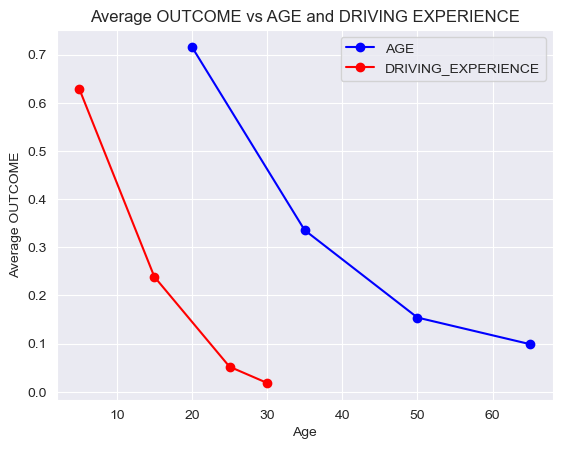

In [14]:
ages = df.groupby('AGE')['OUTCOME'].mean().sort_index()
driving_experiences = df.groupby('DRIVING_EXPERIENCE')['OUTCOME'].mean().sort_index()

plt.figure()

plt.plot(ages.index, ages.values, marker='o', label='AGE', color='blue')
plt.plot(driving_experiences.index, driving_experiences.values, marker='o', label='DRIVING_EXPERIENCE', color='red')

plt.title('Average OUTCOME vs AGE and DRIVING EXPERIENCE')
plt.xlabel('Age')
plt.ylabel('Average OUTCOME')
plt.legend()
plt.show()

From this graph, we can see the relationship between the Age and Experience columns. We can also conclude that younger people are more likely to apply for a loan from an insurance company.

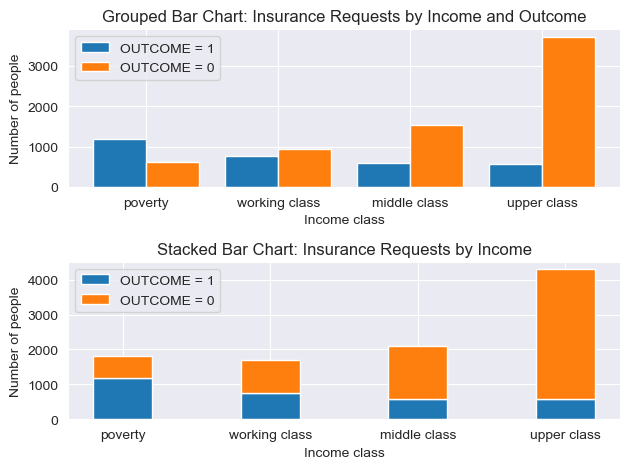

In [15]:
income_labels = {0: 'poverty', 1: 'working class', 2: 'middle class', 3: 'upper class'}

grouped = df[df['OUTCOME'].isin([0, 1])].groupby(['INCOME', 'OUTCOME']).size().unstack(fill_value=0)

grouped = grouped.reindex([0, 1, 2, 3])

x = range(len(grouped))
bar_width = 0.4

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.bar([i - bar_width/2 for i in x], grouped[1], width=bar_width, label='OUTCOME = 1')
ax1.bar([i + bar_width/2 for i in x], grouped[0], width=bar_width, label='OUTCOME = 0')

ax1.set_title('Grouped Bar Chart: Insurance Requests by Income and Outcome')
ax1.set_xlabel('Income class')
ax1.set_ylabel('Number of people')
ax1.set_xticks(x)
ax1.set_xticklabels([income_labels[i] for i in x])
ax1.legend()

ax2.bar(x, grouped[1], width=bar_width, label='OUTCOME = 1')
ax2.bar(x, grouped[0], width=bar_width, bottom=grouped[1], label='OUTCOME = 0')

ax2.set_title('Stacked Bar Chart: Insurance Requests by Income')
ax2.set_xlabel('Income class')
ax2.set_ylabel('Number of people')
ax2.set_xticks(x)
ax2.set_xticklabels([income_labels[i] for i in x])
ax2.legend()

plt.tight_layout()
plt.show()

From these graphs it is clear that people with high incomes are the least likely to contact an insurance company.
While the target audience is the 'poverty' and 'working class'.

In [16]:
# Make indicator feature for NaN values
df['CREDIT_SCORE_NAN'] = 0
df.loc[df['CREDIT_SCORE'].isna(), 'CREDIT_SCORE_NAN'] = 1

#Fill NaN by using median
median_score = df['CREDIT_SCORE'].median()
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(median_score)

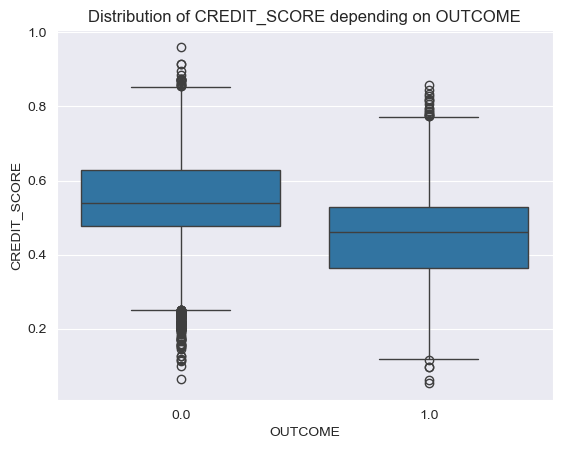

In [17]:
sns.boxplot(x='OUTCOME', y='CREDIT_SCORE', data=df)
plt.title('Distribution of CREDIT_SCORE depending on OUTCOME')
plt.show()

This graph shows that the average credit score of those with a positive OUTCOME is slightly lower than that of those with a negative OUTCOME. It is also possible to notice a wider range of values in the group with a positive OUTCOME, indicating greater variability.

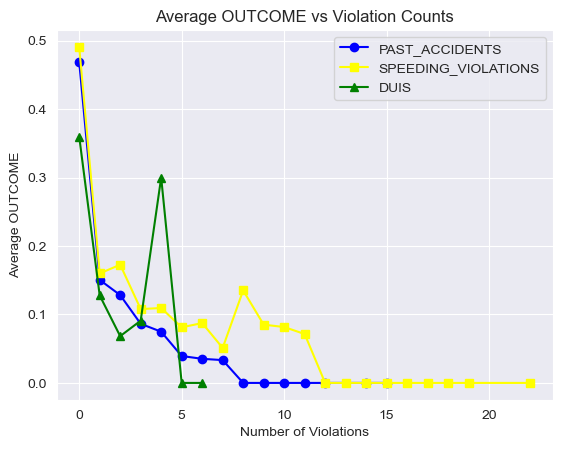

In [18]:
accidents = df.groupby('PAST_ACCIDENTS')['OUTCOME'].mean().sort_index()
speeding = df.groupby('SPEEDING_VIOLATIONS')['OUTCOME'].mean().sort_index()
duis = df.groupby('DUIS')['OUTCOME'].mean().sort_index()

plt.figure()

plt.plot(accidents.index, accidents.values, marker='o', label='PAST_ACCIDENTS', color='blue')
plt.plot(speeding.index, speeding.values, marker='s', label='SPEEDING_VIOLATIONS', color='yellow')
plt.plot(duis.index, duis.values, marker='^', label='DUIS', color='green')

plt.title('Average OUTCOME vs Violation Counts')
plt.xlabel('Number of Violations')
plt.ylabel('Average OUTCOME')
plt.legend()
plt.show()

This graph shows that the SPEEDING_VIOLATIONS, DUIS, and PAST_ACCIDENTS features have similar dynamics relative to the target value, so it was decided to create a new TOTAL_VIOLATIONS feature based on them.

In [19]:
df['TOTAL_VIOLATIONS'] = df['SPEEDING_VIOLATIONS'] + df['DUIS'] + df['PAST_ACCIDENTS']

for col in ('SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'):
    drop_cols.append(col)

In [20]:
print(df['VEHICLE_TYPE'].isna().sum())
print(df['VEHICLE_OWNERSHIP'].corr(df['VEHICLE_TYPE']))
print(df['VEHICLE_OWNERSHIP'].corr(df['OUTCOME']))
print(df['OUTCOME'].corr(df['VEHICLE_TYPE']))

drop_cols.append('VEHICLE_TYPE')

97
0.006766432485225445
-0.37963336872674325
0.00510190766998872


From these calculations it can be concluded that VEHICLE_TYPE has no effect on the target value

In [21]:
df.drop(drop_cols, axis=1, inplace=True)